In [2]:
import pandas as pd

# 필기할 내용
df = pd.read_csv("gapminder.tsv", sep = "\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
# 열선택
df[['country', 'year']]

,country,year
0,Afghanistan,1952
1,Afghanistan,1957
2,Afghanistan,1962
3,Afghanistan,1967
4,Afghanistan,1972
...,...,...
1699,Zimbabwe,1987
1700,Zimbabwe,1992
1701,Zimbabwe,1997
1702,Zimbabwe,2002


In [5]:
# 행
# loc : 이름으로 접근
# iloc : 순서로 접근

df.loc[[0,10,100,1000], ['country', 'year']] # 0이라고 적힌 행

,country,year
0,Afghanistan,1952
10,Afghanistan,2002
100,Bangladesh,1972
1000,Mongolia,1972


In [6]:
df.iloc[[0, 10, 100, 1000], [0, 2]]

,country,year
0,Afghanistan,1952
10,Afghanistan,2002
100,Bangladesh,1972
1000,Mongolia,1972


In [7]:
# 열 : 시리즈
# 표 : 데이터프레임

s1 = pd.Series([1,3,5,4,2,6,7])
s1

0    1
1    3
2    5
3    4
4    2
5    6
6    7
dtype: int64

In [8]:
s1.mean()

4.0

In [9]:
s1.max()

7

In [10]:
s1.min()

1

In [ ]:
s1.median()

4.0

In [ ]:
s1.std()

2.160246899469287

In [ ]:
s1.describe()

count    7.000000
mean     4.000000
std      2.160247
min      1.000000
25%      2.500000
50%      4.000000
75%      5.500000
max      7.000000
dtype: float64

In [ ]:
s2 = pd.Series([1,2,3])
s2

0    1
1    2
2    3
dtype: int64

In [ ]:
s1 + s2

0    2.0
1    5.0
2    8.0
3    NaN
4    NaN
5    NaN
6    NaN
dtype: float64

In [ ]:
year = df['year']
year

0       1952
1       1957
2       1962
3       1967
4       1972
        ... 
1699    1987
1700    1992
1701    1997
1702    2002
1703    2007
Name: year, Length: 1704, dtype: int64

In [ ]:
# 중복값 없애기
year.drop_duplicates()

0     1952
1     1957
2     1962
3     1967
4     1972
5     1977
6     1982
7     1987
8     1992
9     1997
10    2002
11    2007
Name: year, dtype: int64

In [ ]:
d = pd.DataFrame({
    "이름" : ['홍길동', '장원영', '아이유'],
    "성별" : ['남자', '여자', '여자'],
    "나이" : [40, 20, 30]
}, index=['가','나','다'], columns = ['성별', '나이', '이름'])

d

,성별,나이,이름
가,남자,40,홍길동
나,여자,20,장원영
다,여자,30,아이유


In [ ]:
result = df.groupby("year")['lifeExp'].mean()
result

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

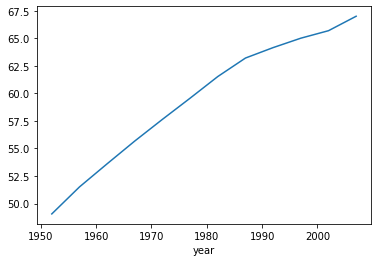

In [ ]:
result.plot()

In [ ]:
result2 = df.groupby(['year', 'continent'])['lifeExp'].mean()
result2.to_excel("result2.xlsx")

In [ ]:
# count()
# 대륙별로 나라가 몇 개

df.groupby("continent")['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [ ]:
df.groupby("continent")['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [ ]:
# utf-8, euc-kr, cp949
df = pd.read_csv("person_info.csv", encoding = "euc-kr")
df

,이름,출생일,사망일,나이,직업
0,홍길동,1920-07-25,1958-04-16,37,회사원
1,이순신,1876-06-13,1937-10-16,61,군인
2,이홍길,1820-05-12,1910-08-13,90,의사
3,곽재우,1867-11-07,1934-07-04,66,연구원
4,신나라,1907-05-27,1964-04-14,56,연구원
5,오기영,1813-03-15,1858-06-16,45,연구원
6,기충현,1912-06-23,1954-06-07,41,회사원
7,심기한,1777-04-30,1855-02-23,77,백수


In [ ]:
df['출생일'] = pd.to_datetime(df['출생일'], format = "%Y-%m-%d")
df['사망일'] = pd.to_datetime(df['사망일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      8 non-null      object        
 1   출생일     8 non-null      datetime64[ns]
 2   사망일     8 non-null      datetime64[ns]
 3   나이      8 non-null      int64         
 4   직업      8 non-null      object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 448.0+ bytes


In [ ]:
df['생존일'] = df['사망일'] - df['출생일']
df

,이름,출생일,사망일,나이,직업,생존일
0,홍길동,1920-07-25,1958-04-16,37,회사원,13779 days
1,이순신,1876-06-13,1937-10-16,61,군인,22404 days
2,이홍길,1820-05-12,1910-08-13,90,의사,32964 days
3,곽재우,1867-11-07,1934-07-04,66,연구원,24345 days
4,신나라,1907-05-27,1964-04-14,56,연구원,20777 days
5,오기영,1813-03-15,1858-06-16,45,연구원,16529 days
6,기충현,1912-06-23,1954-06-07,41,회사원,15324 days
7,심기한,1777-04-30,1855-02-23,77,백수,28422 days


In [ ]:
df['출생일'].dt.year

0    1920
1    1876
2    1820
3    1867
4    1907
5    1813
6    1912
7    1777
Name: 출생일, dtype: int64

In [ ]:
df['출생일'].dt.month

0     7
1     6
2     5
3    11
4     5
5     3
6     6
7     4
Name: 출생일, dtype: int64

In [ ]:
df['출생일'].dt.day

0    25
1    13
2    12
3     7
4    27
5    15
6    23
7    30
Name: 출생일, dtype: int64

In [ ]:
import pandas as pd

df = pd.read_csv("gapminder.tsv", sep = "\t")
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# & : and
# | : or
df[(df['lifeExp'] > df['lifeExp'].mean()) | (df['continent'] == 'Europe')]

,country,continent,year,lifeExp,pop,gdpPercap
14,Albania,Europe,1962,64.820,1728137,2312.888958
15,Albania,Europe,1967,66.220,1984060,2760.196931
16,Albania,Europe,1972,67.690,2263554,3313.422188
17,Albania,Europe,1977,68.930,2509048,3533.003910
18,Albania,Europe,1982,70.420,2780097,3630.880722
...,...,...,...,...,...,...
1603,United Kingdom,Europe,1987,75.007,56981620,21664.787670
1604,United Kingdom,Europe,1992,76.420,57866349,22705.092540
1605,United Kingdom,Europe,1997,77.218,58808266,26074.531360
1606,United Kingdom,Europe,2002,78.471,59912431,29478.999190


In [ ]:
df['lifeExp'].mean()

59.474439366197174

In [ ]:
df['lifeExp'] > df['lifeExp'].mean()

0       False
1       False
2       False
3       False
4       False
        ...  
1699     True
1700     True
1701    False
1702    False
1703    False
Name: lifeExp, Length: 1704, dtype: bool

In [13]:
import matplotlib.pyplot as plt # 그래프
import seaborn as sns # 데이터분석연습용 + 그래프

In [15]:
# matplotlib, 커스터마이징
# seaborn # 자동
# pandas 간단하게 그려볼 때

# dataset열이 I인 행만 추출해보세요.
anscombe = sns.load_dataset("anscombe")

data1 = anscombe[anscombe['dataset'] == "I"]
data2 = anscombe[anscombe['dataset'] == 'II']
data3 = anscombe[anscombe['dataset'] == 'III']
data4 = anscombe[anscombe['dataset'] == 'IV']

In [16]:
print(data1.mean())
print(data2.mean())
print(data3.mean())
print(data4.mean())

x    9.000000
y    7.500909
dtype: float64
x    9.000000
y    7.500909
dtype: float64
x    9.0
y    7.5
dtype: float64
x    9.000000
y    7.500909
dtype: float64


<ipython-input-16-d6d78d6324e6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data1.mean())
<ipython-input-16-d6d78d6324e6>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data2.mean())
<ipython-input-16-d6d78d6324e6>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data3.mean())
<ipython-input-16-d6d78d6324e6>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeEr

In [17]:
print(data1.std())
print(data2.std())
print(data3.std())
print(data4.std())

x    3.316625
y    2.031568
dtype: float64
x    3.316625
y    2.031657
dtype: float64
x    3.316625
y    2.030424
dtype: float64
x    3.316625
y    2.030579
dtype: float64


<ipython-input-17-531fedacbb7d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data1.std())
<ipython-input-17-531fedacbb7d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data2.std())
<ipython-input-17-531fedacbb7d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data3.std())
<ipython-input-17-531fedacbb7d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError

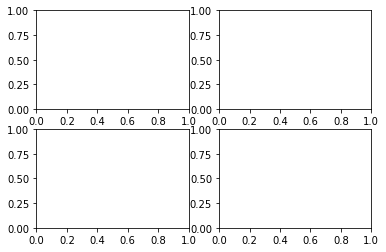

In [18]:
fig = plt.figure() # 도화지 준비

ax1 = fig.add_subplot(2, 2, 1) # 2행 2열 1번째
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

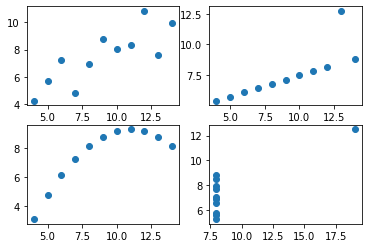

In [19]:
ax1.scatter(data1['x'], data1['y'])
ax2.scatter(data3['x'], data3['y'])
ax3.scatter(data2['x'], data2['y'])
ax4.scatter(data4['x'], data4['y'])

fig

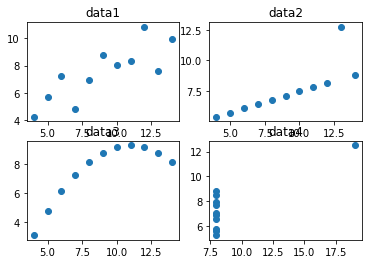

In [20]:
ax1.set_title("data1")
ax2.set_title("data2")
ax3.set_title("data3")
ax4.set_title("data4")

fig

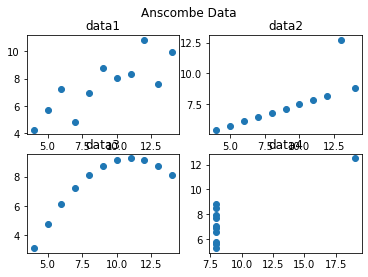

In [21]:
fig.suptitle("Anscombe Data")
fig

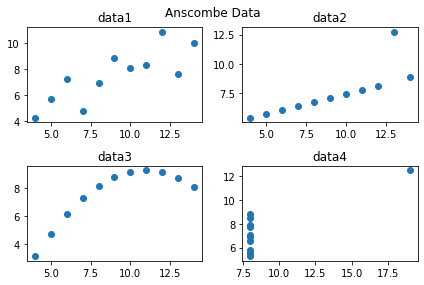

In [22]:
fig.tight_layout()
fig

In [23]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'Freq.')

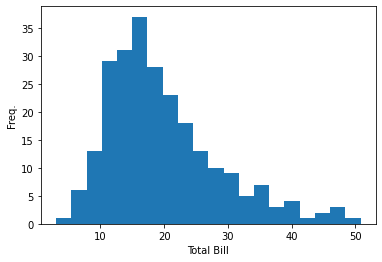

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips['total_bill'], bins=20) # 일변량 그래프

ax.set_xlabel("Total Bill")
ax.set_ylabel("Freq.")

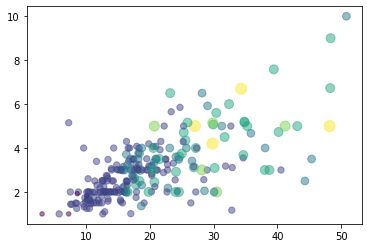

In [25]:
# 이변량 그래프
plt.scatter(tips['total_bill'], tips['tip'],
            c = tips['size'], s = tips['size']*20,
            alpha = 0.5)

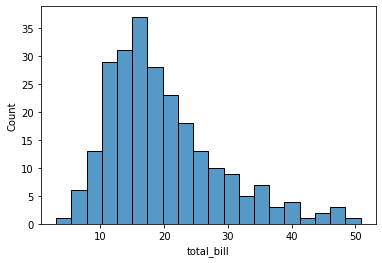

In [26]:
# seaborn
sns.histplot(tips['total_bill'], bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


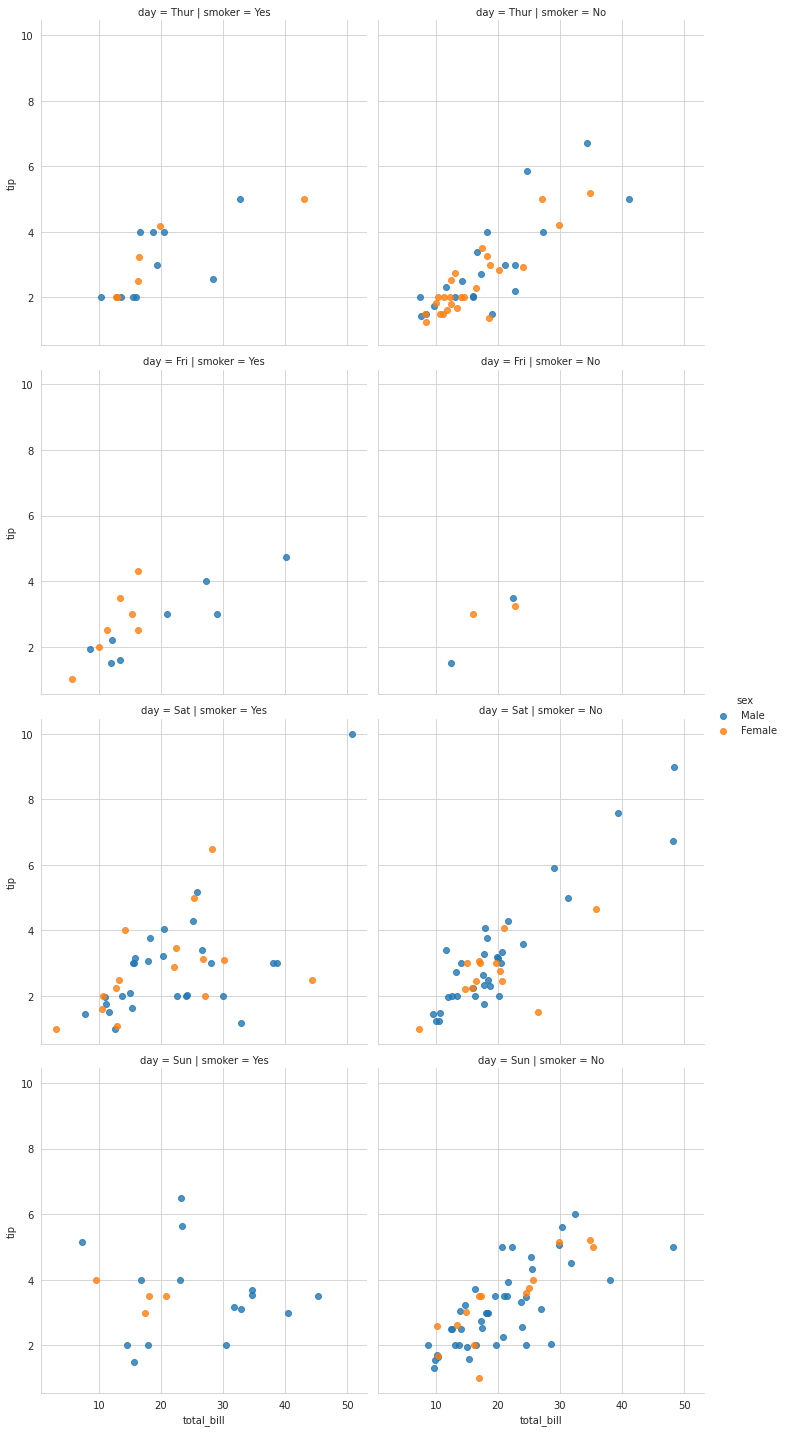

In [27]:
sns.set_style("whitegrid")
sns.lmplot('total_bill', 'tip', data=tips,
           fit_reg = False, hue='sex', col = 'smoker',
           row = "day")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


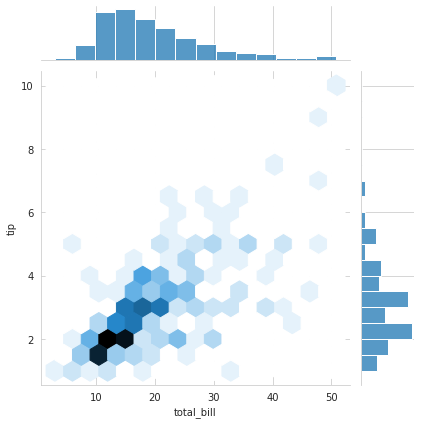

In [28]:
sns.jointplot('total_bill', 'tip', data=tips,
              kind = 'hex')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


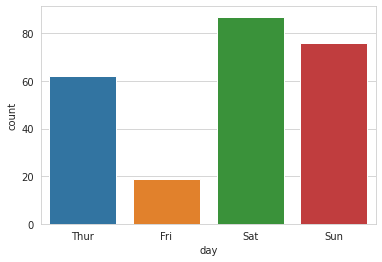

In [29]:
sns.countplot(tips['day'])

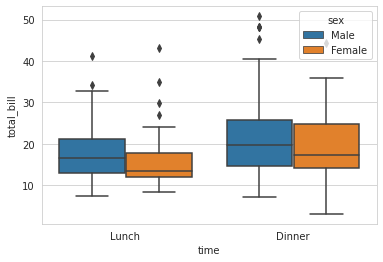

In [30]:
sns.boxplot(x='time', y='total_bill', data=tips,
            hue='sex')

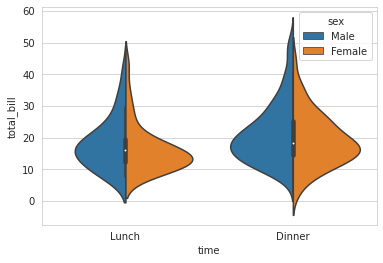

In [31]:
sns.violinplot(x='time', y='total_bill', data=tips,
               hue='sex', split=True)

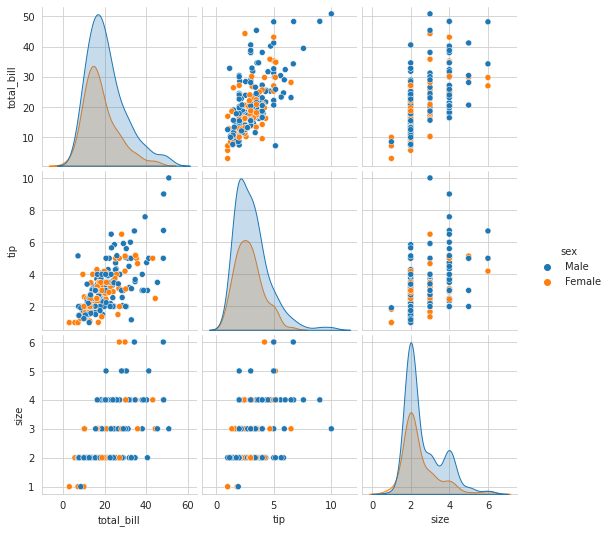

In [32]:
sns.pairplot(tips, hue='sex') # 다변량

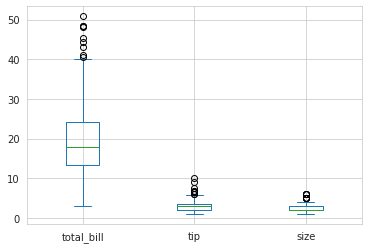

In [33]:
tips.plot.box()

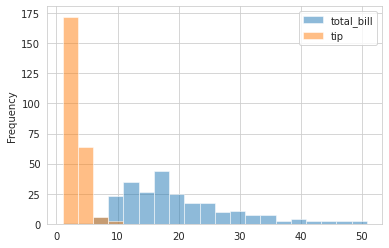

In [34]:
tips[['total_bill', 'tip']].plot.hist(bins=20, alpha=0.5)

In [36]:
# 데이터프레임 합치기

df1 = pd.read_csv("concat_1.csv")
df2 = pd.read_csv("concat_2.csv")
df3 = pd.read_csv("concat_3.csv")

In [ ]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [ ]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [ ]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [ ]:
# 열 이름 기준
result = pd.concat([df1, df2, df3], ignore_index=True)
result

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [ ]:
result.loc[0]

,A,B,C,D
0,a0,b0,c0,d0
0,a4,b4,c4,d4
0,a8,b8,c8,d8


In [ ]:
# axis가 0이면 행방향
# 1이면 열방향
result = pd.concat([df1, df2, df3], axis = 1,
                   ignore_index=True)
result

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [ ]:
df2.columns = ['A','C', 'E', 'F']
df2

,A,C,E,F
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [ ]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F
0,a0,b0,c0,d0,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN
0,a4,NaN,b4,NaN,c4,d4
1,a5,NaN,b5,NaN,c5,d5
2,a6,NaN,b6,NaN,c6,d6
3,a7,NaN,b7,NaN,c7,d7
0,a8,b8,c8,d8,NaN,NaN
1,a9,b9,c9,d9,NaN,NaN


In [ ]:
df2.index = ['가','나','다','라']
df2

,A,C,E,F
가,a4,b4,c4,d4
나,a5,b5,c5,d5
다,a6,b6,c6,d6
라,a7,b7,c7,d7


In [ ]:
pd.concat([df1, df2, df3], axis = 1)

,A,B,C,D,A,C,E,F,A,B,C,D
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,a9,b9,c9,d9
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a10,b10,c10,d10
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,a11,b11,c11,d11
가,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
나,NaN,NaN,NaN,NaN,a5,b5,c5,d5,NaN,NaN,NaN,NaN
다,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
라,NaN,NaN,NaN,NaN,a7,b7,c7,d7,NaN,NaN,NaN,NaN


In [39]:
# 스마트하게 합치는 방법
# 날씨 정보
person = pd.read_csv("survey_person.csv")
site = pd.read_csv("survey_site.csv")
survey = pd.read_csv("survey_survey.csv")
visited = pd.read_csv("survey_visited.csv")

In [ ]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [ ]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [ ]:
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


In [ ]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [ ]:
result = visited.merge(site, left_on = 'site', right_on = 'name')
del result['name']
result

,ident,site,dated,lat,long
0,619,DR-1,1927-02-08,-49.85,-128.57
1,622,DR-1,1927-02-10,-49.85,-128.57
2,844,DR-1,1932-03-22,-49.85,-128.57
3,734,DR-3,1939-01-07,-47.15,-126.72
4,735,DR-3,1930-01-12,-47.15,-126.72
5,751,DR-3,1930-02-26,-47.15,-126.72
6,752,DR-3,NaN,-47.15,-126.72
7,837,MSK-4,1932-01-14,-48.87,-123.40


In [ ]:
# survey, visited
# survey, person 합쳐보기
# 기준열 이름이 같을 때 on = 
survey.merge(visited, left_on = "taken", right_on = "ident")

,taken,person,quant,reading,ident,site,dated
0,619,dyer,rad,9.82,619,DR-1,1927-02-08
1,619,dyer,sal,0.13,619,DR-1,1927-02-08
2,622,dyer,rad,7.80,622,DR-1,1927-02-10
3,622,dyer,sal,0.09,622,DR-1,1927-02-10
4,734,pb,rad,8.41,734,DR-3,1939-01-07
5,734,lake,sal,0.05,734,DR-3,1939-01-07
6,734,pb,temp,-21.50,734,DR-3,1939-01-07
7,735,pb,rad,7.22,735,DR-3,1930-01-12
8,735,NaN,sal,0.06,735,DR-3,1930-01-12
9,735,NaN,temp,-26.00,735,DR-3,1930-01-12


In [ ]:
# 열을 행으로 내리는 방법
pew = pd.read_csv("pew.csv")
pew2 = pd.melt(pew, id_vars = 'religion',
               var_name = "income", value_name = 'count')
pew2

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [ ]:
# 매 주 마다 음악 점수
billboard = pd.read_csv("billboard.csv")
billboard2 = pd.melt(billboard, id_vars = [	'year','artist','track','time','date.entered'],
                     var_name = 'week', value_name = 'rating')
billboard2

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [ ]:
# melt
ebola = pd.read_csv("country_timeseries.csv")
ebola2 = pd.melt(ebola, id_vars = ['Date', "Day"])
ebola2

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [ ]:
ebola_split = ebola2['variable'].str.split('_')
ebola_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [ ]:
state = ebola_split.str[0]
country = ebola_split.str[1]

In [ ]:
ebola2['State'] = state
ebola2['Country'] = country
del ebola2['variable']
ebola2

,Date,Day,value,State,Country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [ ]:
# 최고기온, 최저기온
# 행을 열로 올리기 : pivot_table
weather = pd.read_csv("weather.csv")
weather2 = pd.melt(weather, id_vars = ['id', 'year', 'month', 'element'],
                   var_name = 'day', value_name = 'temp')
weather2

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [ ]:
weather3 = weather2.pivot_table(index = ['id', 'year', 'month','day'],
                     columns = 'element',
                     values = 'temp',
                     dropna = False)
weather3.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d1,NaN,NaN
1,MX17004,2010,1,d10,NaN,NaN
2,MX17004,2010,1,d11,NaN,NaN
3,MX17004,2010,1,d12,NaN,NaN
4,MX17004,2010,1,d13,NaN,NaN
...,...,...,...,...,...,...
336,MX17004,2010,12,d5,NaN,NaN
337,MX17004,2010,12,d6,27.8,10.5
338,MX17004,2010,12,d7,NaN,NaN
339,MX17004,2010,12,d8,NaN,NaN


In [ ]:
weather2

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [ ]:
# 누락값
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ebola.fillna(ebola.mean())

<ipython-input-163-d519e9356c25>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ebola.fillna(ebola.mean())


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.000000,2335.337349,10030.000000,16.736842,1.08,3.277778,1.0,3.5,1786.00000,1101.209877,2977.000000,6.131579,0.0,0.833333,0.1875,3.166667
1,1/4/2015,288,2775.000000,2335.337349,9780.000000,16.736842,1.08,3.277778,1.0,3.5,1781.00000,1101.209877,2943.000000,6.131579,0.0,0.833333,0.1875,3.166667
2,1/3/2015,287,2769.000000,8166.000000,9722.000000,16.736842,1.08,3.277778,1.0,3.5,1767.00000,3496.000000,2915.000000,6.131579,0.0,0.833333,0.1875,3.166667
3,1/2/2015,286,911.064516,8157.000000,2427.367816,16.736842,1.08,3.277778,1.0,3.5,563.23913,3496.000000,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
4,12/31/2014,284,2730.000000,8115.000000,9633.000000,16.736842,1.08,3.277778,1.0,3.5,1739.00000,3471.000000,2827.000000,6.131579,0.0,0.833333,0.1875,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.000000,8.000000,6.000000,16.736842,1.08,3.277778,1.0,3.5,66.00000,6.000000,5.000000,6.131579,0.0,0.833333,0.1875,3.166667
118,3/26/2014,4,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,62.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
119,3/25/2014,3,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,60.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667
120,3/24/2014,2,86.000000,2335.337349,2427.367816,16.736842,1.08,3.277778,1.0,3.5,59.00000,1101.209877,693.701149,6.131579,0.0,0.833333,0.1875,3.166667


In [40]:
from numpy import nan

# for i in 데이터:
#     if pd.isnull(i) == True:
#         처리

# 무한대 == 무한대

nan == True

False

In [ ]:
nan == False

False

In [ ]:
nan == 0

False

In [ ]:
nan == nan

False

In [ ]:
pd.isnull(nan)

True

In [ ]:
pd.isnull(5)

False

In [ ]:
ebola.fillna(method = 'ffill') 

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
ebola.fillna(method = 'bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,8166.0,10030.0,20.0,1.0,4.0,1.0,7.0,1786.0,3496.0,2977.0,8.0,0.0,1.0,0.0,6.0
1,1/4/2015,288,2775.0,8166.0,9780.0,20.0,1.0,4.0,1.0,7.0,1781.0,3496.0,2943.0,8.0,0.0,1.0,0.0,6.0
2,1/3/2015,287,2769.0,8166.0,9722.0,20.0,1.0,4.0,1.0,7.0,1767.0,3496.0,2915.0,8.0,0.0,1.0,0.0,6.0
3,1/2/2015,286,2730.0,8157.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3496.0,2827.0,8.0,0.0,1.0,0.0,6.0
4,12/31/2014,284,2730.0,8115.0,9633.0,20.0,1.0,4.0,1.0,7.0,1739.0,3471.0,2827.0,8.0,0.0,1.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
date = pd.to_datetime(['2022/12/01', '2022/12/02', '2022/12/05', '2022/12/10'])
date

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-05', '2022-12-10'], dtype='datetime64[ns]', freq=None)

In [ ]:
s = pd.Series([1,nan,nan,10], index=date)
s

2022-12-01     1.0
2022-12-02     NaN
2022-12-05     NaN
2022-12-10    10.0
dtype: float64

In [ ]:
s.interpolate(method = 'time')

2022-12-01     1.0
2022-12-02     2.0
2022-12-05     5.0
2022-12-10    10.0
dtype: float64

In [ ]:
ebola.interpolate() #

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
# 성명 열 만들기
# 성, 이름 열 삭제하기
df = pd.read_excel("직원 정보.xlsx", sheet_name="Sheet1")
df['성명'] = df['성'] + df['이름']

del df['성']
del df['이름']

df

,순번,영문명,사원번호,주소,전화번호,성명
0,1,kim cheolsu,2005-1478345,강서구 공항로 20455,010-1000-8735,김철수
1,2,park jongsu,2010-1345972,강서구 대저중앙로 3009,010-1000-8736,박종수
2,3,kim hana,2012-1487234,강서구 하덕로 1002,010-1000-8737,김하나
3,4,lee baekman,2001-3747234,기장군 기장읍 연화100길,010-1000-8738,이백만
4,5,baek osip,2002-4972944,기장군 기장읍 차성로,010-1000-8739,백오십
5,6,youngwoong jaejun,2011-2382747,기장군 기장읍 기장해안로,010-1000-8740,영웅재준
6,7,hyun bin,2000-2395634,남구 지게골로 10-2,010-1000-8741,현빈
7,8,jang hana,2015-1626816,동래구 온천장로107-100,010-1000-8742,장하나
8,9,yoo dooul,2016-4323930,동래구 동래로116,010-1000-8743,유두울
9,10,chae il,2012-3967845,북구 효열로 2502,010-1000-8744,채일


In [ ]:
# 사원번호앞4자리 열 만들기
df['사원번호앞4자리'] = df['사원번호'].str[0:4]
df

,순번,영문명,사원번호,주소,전화번호,성명,사원번호앞4자리
0,1,kim cheolsu,2005-1478345,강서구 공항로 20455,010-1000-8735,김철수,2005
1,2,park jongsu,2010-1345972,강서구 대저중앙로 3009,010-1000-8736,박종수,2010
2,3,kim hana,2012-1487234,강서구 하덕로 1002,010-1000-8737,김하나,2012
3,4,lee baekman,2001-3747234,기장군 기장읍 연화100길,010-1000-8738,이백만,2001
4,5,baek osip,2002-4972944,기장군 기장읍 차성로,010-1000-8739,백오십,2002
5,6,youngwoong jaejun,2011-2382747,기장군 기장읍 기장해안로,010-1000-8740,영웅재준,2011
6,7,hyun bin,2000-2395634,남구 지게골로 10-2,010-1000-8741,현빈,2000
7,8,jang hana,2015-1626816,동래구 온천장로107-100,010-1000-8742,장하나,2015
8,9,yoo dooul,2016-4323930,동래구 동래로116,010-1000-8743,유두울,2016
9,10,chae il,2012-3967845,북구 효열로 2502,010-1000-8744,채일,2012


In [ ]:
df['영문명'].str.upper()

0          KIM CHEOLSU
1          PARK JONGSU
2             KIM HANA
3          LEE BAEKMAN
4            BAEK OSIP
5    YOUNGWOONG JAEJUN
6             HYUN BIN
7            JANG HANA
8            YOO DOOUL
9              CHAE IL
Name: 영문명, dtype: object

In [ ]:
df['영문명'].str.lower()

0          kim cheolsu
1          park jongsu
2             kim hana
3          lee baekman
4            baek osip
5    youngwoong jaejun
6             hyun bin
7            jang hana
8            yoo dooul
9              chae il
Name: 영문명, dtype: object

In [ ]:
df['영문명'].str.capitalize()

0          Kim cheolsu
1          Park jongsu
2             Kim hana
3          Lee baekman
4            Baek osip
5    Youngwoong jaejun
6             Hyun bin
7            Jang hana
8            Yoo dooul
9              Chae il
Name: 영문명, dtype: object

In [ ]:
df['전화번호'].str.replace("-", "", 1)

0    0101000-8735
1    0101000-8736
2    0101000-8737
3    0101000-8738
4    0101000-8739
5    0101000-8740
6    0101000-8741
7    0101000-8742
8    0101000-8743
9    0101000-8744
Name: 전화번호, dtype: object

In [ ]:
# 합, 평균 열 만들기
df = pd.read_excel("성적 처리.xlsx", sheet_name = 'Sheet1')

# df['합'] = df['국어'] + df['영어'] + df['수학'] + df['사회'] + df['과학']
# df["평균"] = df['합'] / 5
# df

df["합"] = df.iloc[:, 2:].sum(axis=1)
df['평균'] = df['합'] / 5
df

,반,성명,국어,영어,수학,사회,과학,합,평균
0,1반,홍길동,93,80,94,73,64,404,80.8
1,5반,백일홍,93,63,76,84,92,408,81.6
2,3반,이삼상,94,74,86,90,70,414,82.8
3,4반,정말로,83,55,64,90,65,357,71.4
4,5반,한번도,87,95,66,75,60,383,76.6
5,4반,이철수,53,81,59,88,69,350,70.0
6,3반,김영자,71,71,51,84,57,334,66.8
7,5반,다니엘,87,54,95,71,97,404,80.8
8,2반,이미로,59,54,75,90,82,360,72.0
9,1반,신성삼,64,66,59,91,86,366,73.2


In [ ]:
# average : 3등이 2명이면, 3.5등으로 하고 다음 등수는 5등
df['순위'] = df['평균'].rank(method = 'average', ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.5
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.5
4,5반,한번도,87,95,66,75,60,383,76.6,7.5
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.5
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [ ]:
# max : 3등이 2명이면, 4등으로 하고 다음 등수는 5등
df['순위'] = df['평균'].rank(method = 'max', ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,4.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,13.0
4,5반,한번도,87,95,66,75,60,383,76.6,8.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,4.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [ ]:
# min : 3등이 2명이면, 3등으로 하고 다음 등수는 5등
df['순위'] = df['평균'].rank(method = 'min', ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.0
4,5반,한번도,87,95,66,75,60,383,76.6,7.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [ ]:
# first : 3등이 2명이면, 처음 발견한 3등, 4등
df['순위'] = df['평균'].rank(method = 'first', ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,12.0
4,5반,한번도,87,95,66,75,60,383,76.6,7.0
5,4반,이철수,53,81,59,88,69,350,70.0,14.0
6,3반,김영자,71,71,51,84,57,334,66.8,17.0
7,5반,다니엘,87,54,95,71,97,404,80.8,4.0
8,2반,이미로,59,54,75,90,82,360,72.0,11.0
9,1반,신성삼,64,66,59,91,86,366,73.2,10.0


In [ ]:
# dense : min방법과 같다. 다음 등수를 4등
df['순위'] = df['평균'].rank(method = 'dense', ascending=False)
df

,반,성명,국어,영어,수학,사회,과학,합,평균,순위
0,1반,홍길동,93,80,94,73,64,404,80.8,3.0
1,5반,백일홍,93,63,76,84,92,408,81.6,2.0
2,3반,이삼상,94,74,86,90,70,414,82.8,1.0
3,4반,정말로,83,55,64,90,65,357,71.4,10.0
4,5반,한번도,87,95,66,75,60,383,76.6,6.0
5,4반,이철수,53,81,59,88,69,350,70.0,11.0
6,3반,김영자,71,71,51,84,57,334,66.8,14.0
7,5반,다니엘,87,54,95,71,97,404,80.8,3.0
8,2반,이미로,59,54,75,90,82,360,72.0,9.0
9,1반,신성삼,64,66,59,91,86,366,73.2,8.0
